<a href="https://colab.research.google.com/github/Swarna-Saha324/Software_Engineering/blob/main/Copy_of_Final_Lab_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Milestone 1: Data Understanding & Exploration
- Load the diabetes dataset using scikit-learn and display the first five rows
- Perform descriptive statistics (mean, median, min, max) and summarize class balance
- Visualize the distributions of at least two features using histograms or box plots

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load Diabetes dataset
diabetes = load_diabetes(as_frame=True)
df_diabetes = diabetes.frame
print("\nDiabetes Dataset:")
print(df_diabetes.head())



Diabetes Dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [3]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [5]:
print("🔹 First 5 rows of the dataset:")
print(df.head())

🔹 First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [6]:
desc_stats = pd.DataFrame({
    'mean': df.mean(),
    'median': df.median(),
    'min': df.min(),
    'max': df.max()
})

print("\n🔹 Descriptive Statistics:")
print(desc_stats)



🔹 Descriptive Statistics:
                mean      median        min         max
age    -1.444295e-18    0.005383  -0.107226    0.110727
sex     2.543215e-18   -0.044642  -0.044642    0.050680
bmi    -2.255925e-16   -0.007284  -0.090275    0.170555
bp     -4.854086e-17   -0.005670  -0.112399    0.132044
s1     -1.428596e-17   -0.004321  -0.126781    0.153914
s2      3.898811e-17   -0.003819  -0.115613    0.198788
s3     -6.028360e-18   -0.006584  -0.102307    0.181179
s4     -1.788100e-17   -0.002592  -0.076395    0.185234
s5      9.243486e-17   -0.001947  -0.126097    0.133597
s6      1.351770e-17   -0.001078  -0.137767    0.135612
target  1.521335e+02  140.500000  25.000000  346.000000



🔹 Target (disease progression) statistics:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


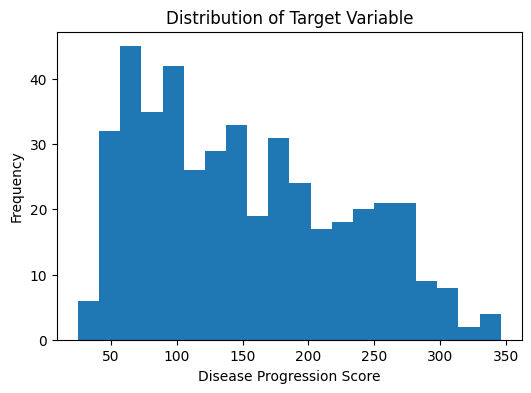

In [7]:
print("\n🔹 Target (disease progression) statistics:")
print(df['target'].describe())

plt.figure(figsize=(6,4))
plt.hist(df['target'], bins=20)
plt.title("Distribution of Target Variable")
plt.xlabel("Disease Progression Score")
plt.ylabel("Frequency")
plt.show()

In [10]:
features_to_plot = ['bmi', 'bp']

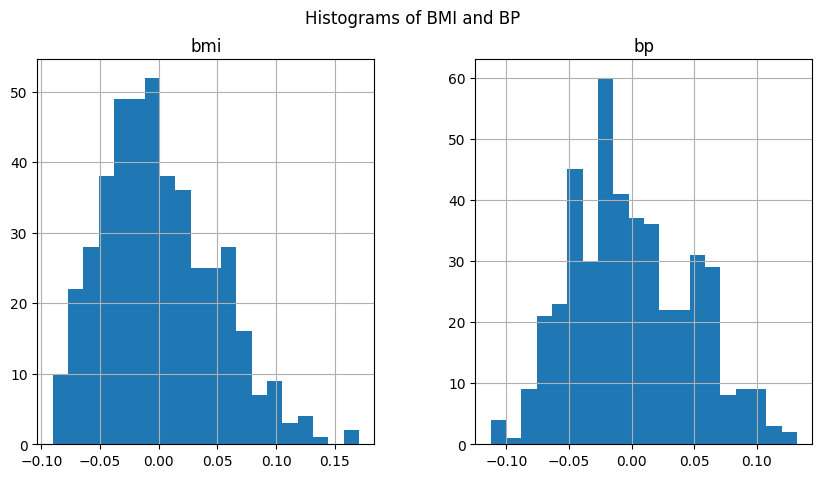

In [11]:
df[features_to_plot].hist(figsize=(10,5), bins=20)
plt.suptitle("Histograms of BMI and BP")
plt.show()

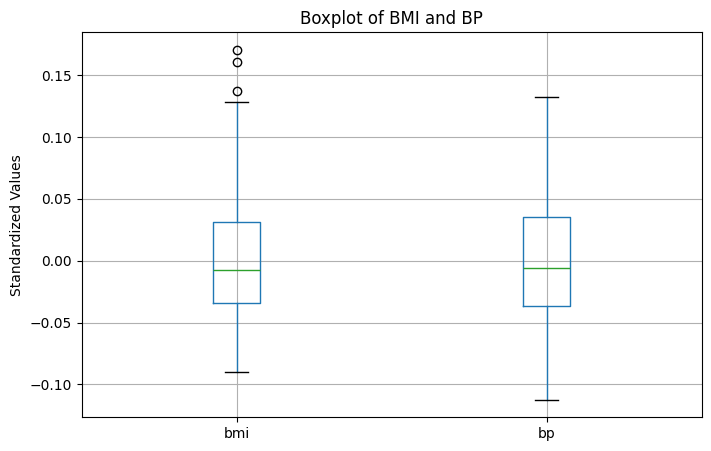

In [12]:
plt.figure(figsize=(8,5))
df[features_to_plot].boxplot()
plt.title("Boxplot of BMI and BP")
plt.ylabel("Standardized Values")
plt.show()

Milestone 2: Data Preparation & Preprocessing
- Handle any missing values, duplicates, or outliers in the dataset
- Apply feature scaling/normalization
- Encode categorical variables (if present) with a suitable technique
- Perform basic correlation analysis and point out highly correlated features

In [13]:
print("\nMissing values in dataset:")
print(df.isnull().sum())



Missing values in dataset:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [14]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

print(f"\nDuplicates removed: {before - after}")


Duplicates removed: 0


In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [20]:
for col in numeric_cols:
    df = remove_outliers(df, col)

print("\nShape after outlier removal:", df.shape)


Shape after outlier removal: (407, 11)


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop("target", axis=1))

df_scaled = pd.DataFrame(scaled_data, columns=data.feature_names)
df_scaled["target"] = df["target"].values

print("\nScaled Data (first 5 rows):")
print(df_scaled.head())



Scaled Data (first 5 rows):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.805659  1.063433  1.381245  0.483184 -0.908545 -0.736670 -0.977478   
1 -0.026775 -0.940351 -1.094533 -0.551582 -0.083856 -0.376464  1.745369   
2  1.789444  1.063433  1.003983 -0.108111 -0.940264 -0.722262 -0.722211   
3 -1.842994 -0.940351 -0.222116 -0.773318  0.391926  0.639317 -0.807300   
4  0.124577 -0.940351 -0.764429  0.483184  0.201613  0.423194  0.213768   

         s4        s5        s6  target  
0  0.010936  0.528762 -0.353296   151.0  
1 -0.836865 -1.450286 -2.035068    75.0  
2  0.010936  0.146446 -0.540160   141.0  
3  0.858737  0.591118 -0.166433   206.0  
4  0.010936 -0.635155 -1.007318   135.0  


In [25]:
import seaborn as sns

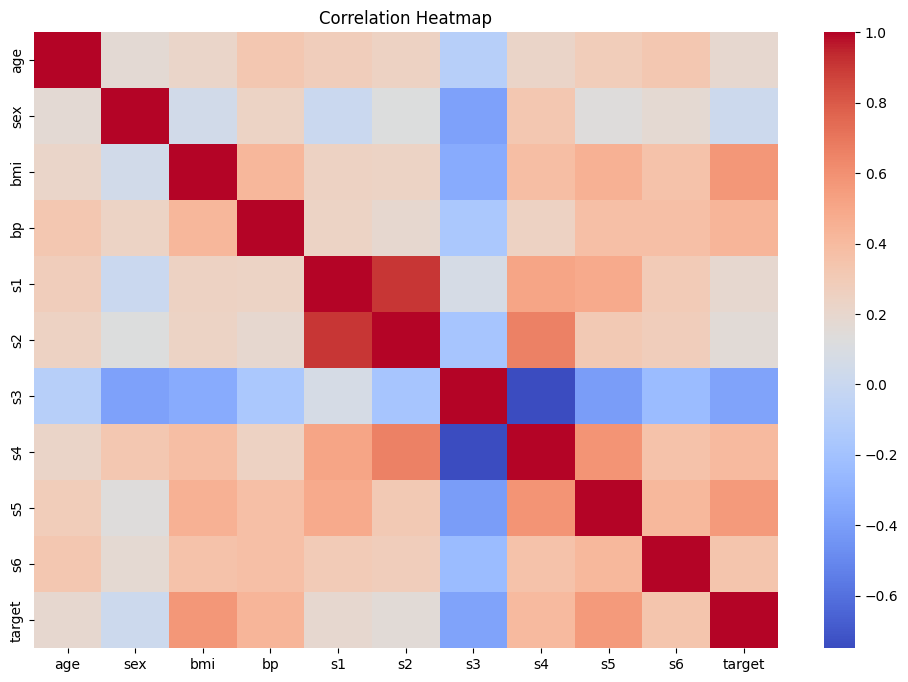

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [27]:
# List highly correlated pairs (|corr| > 0.5)
corr_matrix = df_scaled.corr().abs()
high_corr = corr_matrix[corr_matrix > 0.5]

print("\nHighly Correlated Feature Pairs (|corr| > 0.5):")
pairs = []
for i in high_corr.columns:
    for j in high_corr.index:
        if i != j and high_corr.loc[j, i] > 0.5:
            pairs.append((i, j, high_corr.loc[j, i]))

pairs = list(set(pairs))   # remove duplicates
for p in pairs:
    print(f"{p[0]}  ↔  {p[1]} : correlation = {p[2]:.2f}")


Highly Correlated Feature Pairs (|corr| > 0.5):
s1  ↔  s4 : correlation = 0.51
s4  ↔  s2 : correlation = 0.66
s2  ↔  s1 : correlation = 0.91
s4  ↔  s1 : correlation = 0.51
s4  ↔  s5 : correlation = 0.59
s3  ↔  s4 : correlation = 0.75
bmi  ↔  target : correlation = 0.57
target  ↔  s5 : correlation = 0.56
s5  ↔  target : correlation = 0.56
target  ↔  bmi : correlation = 0.57
s5  ↔  s4 : correlation = 0.59
s1  ↔  s2 : correlation = 0.91
s2  ↔  s4 : correlation = 0.66
s4  ↔  s3 : correlation = 0.75


Milestone 3: Model Selection & Training
- Split the dataset into training and test sets with a suitable ratio
- Choose and train at least two machine learning models (e.g., logistic regression, random forest)
- Include hyperparameter tuning with cross-validation for one chosen model

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = df.drop("target", axis=1)
y = df["target"]

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

In [38]:
def categorize(y):
    if y < 100:
        return 0
    elif y < 150:
        return 1
    else:
        return 2

df["class"] = df["target"].apply(categorize)

X = df.drop(["target", "class"], axis=1)
y = df["class"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


In [44]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Milestone 4: Model Evaluation & Interpretation
- Evaluate the trained models with appropriate metrics (accuracy, ROC-AUC, precision, recall)
- Plot and interpret a confusion matrix for the best model

In [46]:
def evaluate(name, y_true, y_pred):
    print(f"\n📌 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision (macro):", precision_score(y_true, y_pred, average="macro"))
    print("Recall (macro):", recall_score(y_true, y_pred, average="macro"))
    print("F1 Score:", f1_score(y_true, y_pred, average="macro"))

# Evaluate both models
evaluate("Logistic Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)


📌 Logistic Regression Evaluation
Accuracy: 0.6219512195121951
Precision (macro): 0.41444372153545866
Recall (macro): 0.5115830115830117
F1 Score: 0.4549707602339181

📌 Random Forest Evaluation
Accuracy: 0.5609756097560976
Precision (macro): 0.397610513739546
Recall (macro): 0.46364221364221364
F1 Score: 0.42786275320380324


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


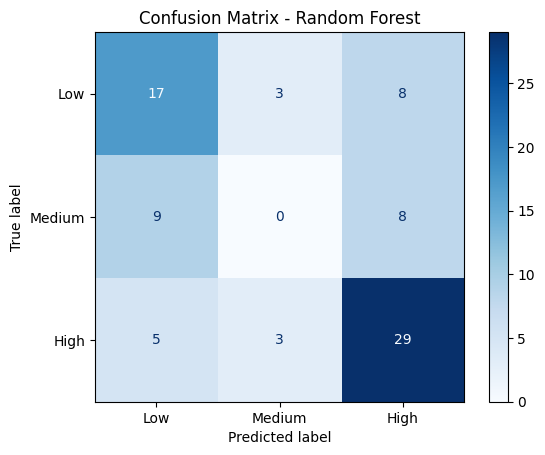

In [47]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Milestone 5: Deployment & Reporting
- save your final trained model for later use
- load the model and making a new prediction

In [55]:
import joblib

# Save Logistic Regression model
joblib.dump(log_reg, "diabetes_logreg_model.pkl")
print("Logistic Regression model saved successfully!")


Logistic Regression model saved successfully!


In [56]:
# Load the saved model
loaded_model = joblib.load("diabetes_logreg_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


In [57]:
# Example new patient (10 features: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6)
new_data = [[
    0.03,   # age
    0.04,   # sex
    0.02,   # bmi
    0.05,   # bp
    -0.02,  # s1
    -0.03,  # s2
    0.04,   # s3
    0.02,   # s4
    0.01,   # s5
    -0.04   # s6
]]

# Predict the class (0 = Low, 1 = Medium, 2 = High)
prediction = loaded_model.predict(new_data)
print("Predicted Class:", prediction[0])


Predicted Class: 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
